# KNN(K-Nearest Neighbors)
The K-Nearest Neighbor (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of classification, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point. For regression, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point.

The KNN algorithm is straightforward and easy to understand, making it a popular choice in various domains. However, its performance can be affected by the choice of K and the distance metric, so careful parameter tuning is necessary for optimal results.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo=pd.read_csv('Zoo.csv')

In [3]:
zoo.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [4]:
zoo.tail()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2

In [5]:
zoo.shape

(101, 18)

In [6]:
zoo[zoo.duplicated()].sum()

animal name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: float64

In [7]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
zoo.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

In [10]:
corr=zoo.corr()

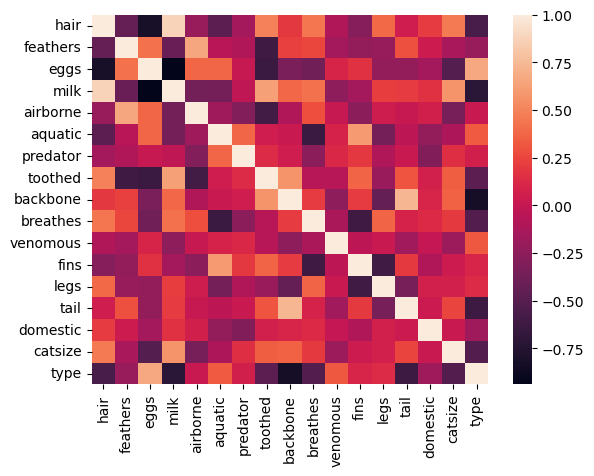

In [11]:
# Correlation Heatmap.
sns.heatmap(corr)
plt.show()

In [12]:
# Dividing The Give Dataset into X and Y.
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,-1]

In [13]:
x.head()

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
2         0         0     1     0     1         0        0  
3         1         0     0     4     0         0        1  
4         1         0     0     4     1         0        1

In [14]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [15]:
y.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

# KNN Model

#### K-Fold Cross Validation
K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This method aids in model assessment, selection, and hyperparameter tuning, providing a more reliable measure of a model’s effectiveness.

In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to avoid overfitting. As we know when a model is trained using all of the data in a single short and give the best performance accuracy. To resist this k-fold cross-validation helps us to build the model is a generalized one.

To achieve this K-Fold Cross Validation, we have to split the data set into three sets, Training, Testing, and Validation, with the challenge of the volume of the data.

Here Test and Train data set will support building model and hyperparameter assessments.

In which the model has been validated multiple times based on the value assigned as a parameter and which is called K and it should be an INTEGER.

Make it simple, based on the K value, the data set would be divided, and train/testing will be conducted in a sequence way equal to K time.

In [16]:
kfold=KFold(n_splits=10)

In [17]:
# Normalize the X data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)



In [18]:
model = KNeighborsClassifier(n_neighbors=12)
#model.fit(x,y)
results = cross_val_score(model, x_normalized, y, cv=kfold)
results

array([1. , 1. , 0.6, 1. , 0.9, 0.8, 0.9, 0.7, 0.6, 0.8])

In [19]:
print(results.mean())

0.8300000000000001


# Grid Search CV


Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

#### Cross-Validation and GridSearchCV
In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process.



In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
n_neighbors= np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [22]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [23]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid.fit(x_normalized, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [24]:
print(grid.best_score_)
print(grid.best_params_)

0.9504761904761905
{'n_neighbors': 1}


#  Visualizing the CV results

In [25]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 40)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x_normalized, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

0     0.950909
4     0.940000
1     0.940000
2     0.930000
5     0.920000
6     0.920000
3     0.910000
7     0.910000
8     0.890000
9     0.880000
17    0.870909
15    0.860909
18    0.860909
16    0.860909
19    0.860909
13    0.860909
12    0.860909
10    0.860909
14    0.850909
11    0.850909
20    0.841818
21    0.821818
22    0.821818
23    0.821818
24    0.821818
25    0.801818
28    0.791818
27    0.791818
26    0.791818
29    0.782727
30    0.782727
31    0.782727
32    0.772727
33    0.762727
34    0.732727
35    0.722727
36    0.712727
37    0.702727
38    0.682727
dtype: float64

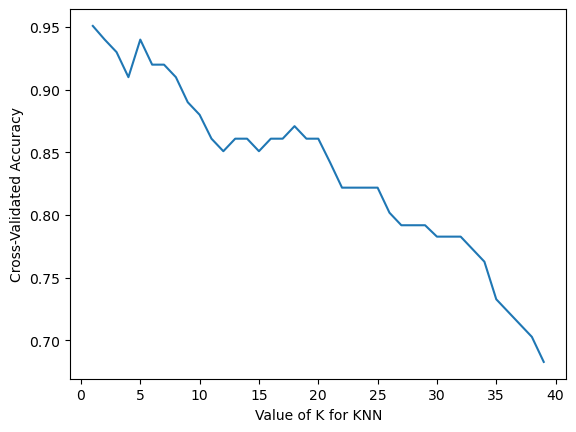

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_normalized, y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [27]:
class_accuracy = pd.DataFrame({'Value of k' : range(1,40),
                            'Accuracy' : k_scores})
class_accuracy


Value of k  Accuracy
0            1  0.950909
1            2  0.940000
2            3  0.930000
3            4  0.910000
4            5  0.940000
5            6  0.920000
6            7  0.920000
7            8  0.910000
8            9  0.890000
9           10  0.880000
10          11  0.860909
11          12  0.850909
12          13  0.860909
13          14  0.860909
14          15  0.850909
15          16  0.860909
16          17  0.860909
17          18  0.870909
18          19  0.860909
19          20  0.860909
20          21  0.841818
21          22  0.821818
22          23  0.821818
23          24  0.821818
24          25  0.821818
25          26  0.801818
26          27  0.791818
27          28  0.791818
28          29  0.791818
29          30  0.782727
30          31  0.782727
31          32  0.782727
32          33  0.772727
33          34  0.762727
34          35  0.732727
35          36  0.722727
36          37  0.712727
37          38  0.702727
38          39  0.682727